## a.

discretize : $u(x_i,y_j, t_n) \approx U^n_{ij} $ using explicit methods

we take the equation : $ u_{tt} = a^2(u_{xx}+u_{yy})$

using central differences for all derivatives, we get:

$ \frac{U^{n+1}_{i,j} + U^{n-1}_{i,j} - 2 U^n_{i,j}}{k^2} = $
$a^2(\frac{U^n_{i-1,j} + U^n_{i+1,j} - 4U^n_{i,j}+ U^n_{i,j+1} + U^n_{i,j-1}}{h^2})$

simplifying terms: 

$ U^{n+1}_{i,j} + U^{n-1}_{i,j} - 2 U^n_{i,j} = $
$\frac{a^2k^2}{h^2}(U^n_{i-1,j} + U^n_{i+1,j} - 4U^n_{i,j}+ U^n_{i,j+1} + U^n_{i,j-1})$

let $ v = \frac{ak}{h}$

$ U^{n+1}_{i,j} + U^{n-1}_{i,j} - 2 U^n_{i,j} = $
$v^2(U^n_{i-1,j} + U^n_{i+1,j} - 4U^n_{i,j}+ U^n_{i,j+1} + U^n_{i,j-1})$

moving parts to rhs:

$ U^{n+1}_{i,j} = $
$v^2(U^n_{i-1,j} + U^n_{i+1,j} - 4U^n_{i,j}+ U^n_{i,j+1} + U^n_{i,j-1}) - U^{n-1}_{i,j} + 2 U^n_{i,j}$

rearranging terms: 

$ U^{n+1}_{i,j} = $
$v^2(U^n_{i-1,j} + U^n_{i+1,j} + U^n_{i,j+1} + U^n_{i,j-1}) + (2 -4v^2)U^n_{i,j} - U^{n-1}_{i,j} $

writing in matrix form: 

$ U^{n+1} = AU^n - BU^{n-1} $  where: 

$A_{(i-1,j),(i+1,j),(i,j+1),(i,j-1)} =  v^2$

$A_{(i,j)} = (2-4v^2) $

$B =$  unit matrix 

## b.

find an expression for $U^1_{i,j}$ in terms of $U^0_{i,j}$

$u(t,k) = u + ku_t + \frac{k^2}{2}u_{tt} + O(k^3)$

this leads to:

$U^1_{i,j} = U^0_{i,j} + ku_t + \frac{k^2}{2}u_{tt} + O(k^3)$

substituting $f$, $g$ and $u_{tt}$ 

$U^1 = f(x_i,y_j) + kg(x_i,y_j) + \frac{k^2a^2}{2}(u_{xx}+u_{yy}) + O(k^3)$

discritizing $u_{xx}$ and $u_{yy}$ yields:

$U^1 = f(x_i,y_j) + kg(x_i,y_j) + \frac{k^2a^2}{2}(\frac{U^0_{i-1,j} + U^0_{i+1,j} - 4U^0_{i,j}+ U^0_{i,j+1} + U^0_{i,j-1}}{h^2})$

$U^1 = f(x_i,y_j) + kg(x_i,y_j) + \frac{k^2a^2}{2h^2}(U^0_{i-1,j} + U^0_{i+1,j} - 4U^0_{i,j}+ U^0_{i,j+1} + U^0_{i,j-1})$

$U^1 = f(x_i,y_j) + kg(x_i,y_j) + \frac{v^2}{2}(U^0_{i-1,j} + U^0_{i+1,j} - 4U^0_{i,j}+ U^0_{i,j+1} + U^0_{i,j-1})$

## c.

implement the scheme by solving wave equation.

In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
# 3D plotting libraries 
from mpl_toolkits.mplot3d.axes3d import Axes3D
import scipy.sparse as sps

#creating a function that return solution vector u
def solveWaveEq(m):
    #problem parameters
    #m = 50 # or 100,200,400
    h = 1/(m+1)
    a = 1.0
    k = h/2
    T = 1.0
    v = (a*k/h)
    v2 = v**2
    N = (m+1)**2  # total number of grid points
    x, y = np.meshgrid(h * np.arange(m + 1), h * np.arange(m + 1))

    f = lambda x,y: np.exp(-100.0*((x-0.5)**2 + (y-0.25)**2))           # f(x,y)
    g = lambda x,y: 0.0*x + 0.0*y  # g(x,y)

    # Mapping from grid indices to solution vector indices
    umap = np.arange(N).reshape(x.shape)
    nsteps = int(round(T/k))
    u = np.zeros((N,nsteps+1))
    u1 = np.zeros((N))
    uout = np.zeros((N))
    # boundary conditions: Start with Identity * u = f(x,y)
    A = sps.eye(N, N, format='lil')
    B = sps.eye(N, N, format='lil')

    #finding U0
    for i in range(1,m):
        for j in range(1,m):
            u[umap[i,j],0] = f(x[i,j],y[i,j])
    #finding U1
    for i in range(1,m):
        for j in range(1,m):
            u[umap[i,j],1] = f(x[i,j],y[i,j]) + k*g(x[i,j],y[i,j])+v2*(f(x[i-1,j],y[i-1,j])+f(x[i+1,j],y[i+1,j])+f(x[i,j+1],y[i,j+1])+f(x[i,j-1],y[i,j-1])-4*f(x[i,j],y[i,j]))

    # Main loop: Implement stencil at all interior points
    for i in range(1,m):
        for j in range(1,m):
            A[umap[j, i], umap[j, i]] = (2-4* v2)
            A[umap[j, i], umap[j, i+1]] = 1 * v2
            A[umap[j, i], umap[j, i-1]] = 1 * v2
            A[umap[j, i], umap[j+1, i]] = 1 * v2
            A[umap[j, i], umap[j-1, i]] = 1 * v2
        
    for k in range(1,nsteps):
        u[:,k+1] = A.dot(u[:,k]) - B.dot(u[:,k-1])
    u1 = u[:,nsteps]
    u1 = u1.reshape(x.shape)
    #uout = u1
        #plotting for m = 400
    if m == 400:
        u1 = u[:,nsteps]
        uout = u1
        #reshaping u
        u1 = u1.reshape(x.shape)
        # Plotting in 2D
        cset1 = plt.contourf(x, y, u1, 10)
        plt.colorbar()
        plt.contour(x, y, u1, cset1.levels, hold='on', colors='k')
        plt.axis('equal')
        plt.show()
        #plotting in 3D
        fig = plt.figure(figsize=plt.figaspect(0.25))
        ax = fig.add_subplot(1, 2, 1, projection='3d')
        surf = ax.plot_surface(x, y, u1, rstride=1, cstride=1, cmap=plt.cm.coolwarm,linewidth=0)
        ax.set_zlim3d(-0.4, 0.25)
        fig.colorbar(surf, shrink=0.5, aspect=10)
        plt.show()
    return u1

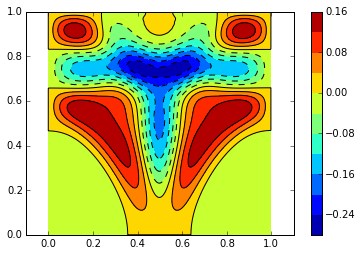

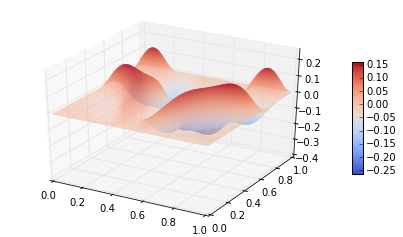

In [2]:
# solving wave equation for multiple m
m = 400 # range:50,100,200,400
u = solveWaveEq(m)
m = 50 
u1 = solveWaveEq(m)
n = 51*51 
m = 100
u2 = solveWaveEq(m)
m = 200
u3 = solveWaveEq(m)

In [3]:
# creating error matrices 
e1 = np.zeros(n, dtype=np.float64)
e2 = np.zeros(n, dtype=np.float64)
e3 = np.zeros(n, dtype=np.float64)

In [4]:
# finding error with respect to exact solution (m = 400)
count = 0
for i in range(1,51):
    for j in range(1,51):
        count = count + 1
        e1[count] = np.abs(u1[i,j]  - u[i*8,j*8]) # 50  points vs 400
        e2[count] = np.abs(u2[i*2,j*2]  - u[i*8,j*8]) # 100  points vs 400
        e3[count] = np.abs(u3[i*4,j*4]  - u[i*8,j*8]) # 200  points vs 400

In [5]:
#finding infinity norm (max(absolute(e(i))))
error = ((max(e1),max(e2),max(e3)))
dh = ((1/50,1/100,1/200))

In [9]:
print('errors: ')
print(error)
slope, intercept = np.polyfit(np.log(dh),np.log(error),1)
print ('slope:',slope)

errors: 
(0.08328890449043197, 0.037148616498546339, 0.012404376329709199)
slope: 1.3736375579


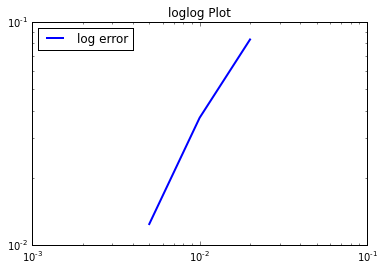

In [10]:
plt.title('loglog Plot')
L1,=plt.loglog(dh,error,label='log error',lw=2)
Leg1=plt.legend(handles=[L1],loc=2)
plt.show()